<a href="https://colab.research.google.com/github/solomon-eke/101445413_COMP3123-exec05/blob/main/Classifying_movie_reviews_A_binary_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying movie reviews: A binary classification exaple

In [50]:
# Loading the IMDB dataset

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [52]:
# The argument num_words=10000 means you’ll only keep the top 10,000 most fre-
# quently occurring words in the training data. Rare words will be discarded. This allows
# us to work with vector data of manageable size. If we didn’t set this limit, we’d be work-
# ing with 88,585 unique words in the training data, which is unnecessarily large. Many
# of these words only occur in a single sample, and thus can’t be meaningfully used for
# classification.
# The variables train_data and test_data are lists of reviews; each review is a list of
# word indices (encoding a sequence of words). train_labels and test_labels are
# lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [53]:
train_data[0]
print(train_data[0])
train_labels[0]
print(train_labels[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [54]:
# Because we’re restricting ourselves to the top 10,000 most frequent words, no word
# index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

In [55]:
# Decoding reviews back to text
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()]) # Reverses it, mapping integer indices to words
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Decode the review. Note that the
#indices are offset by 3 because 0,1, and 2 are reserved indices for "padding", "start of sequence", and "unknown."
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [56]:
# Preparing the data


In [57]:
# Encoding the Integer sequences via multi-hot encoding


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates all-zero matrix of shape(len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Sets specific indices of results[i] to 1s
        return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [58]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [59]:
# Also vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# Now, the data is ready to be fed into a neural network

In [60]:
# Model definition
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid"),
])

In [61]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [62]:
# Validating the approach
# A deep learning model should never be evaluated pn its training data-
# —it’s standard practice to use a validation set to monitor the accuracy of
# the model during training. Here, we’ll create a validation set by setting apart 10,000
# samples from the original training data

In [63]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [64]:
# We will now train the model for 20 epochs (20 iterations over all samples in the train-
# ing data) in mini-batches of 512 samples. At the same time, we will monitor loss and
# accuracy on the 10,000 samples that we set apart. We do so by passing the validation
# data as the validation_data argument

In [65]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.4998 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5029 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5060 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5027 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.4948 - v

In [66]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

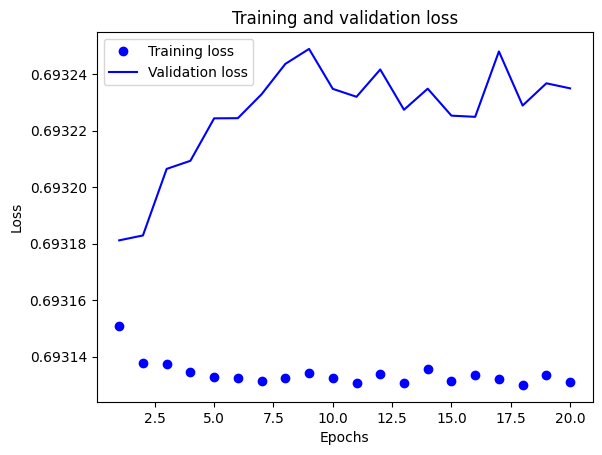

In [67]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
# Ploting the training and validation accuracy

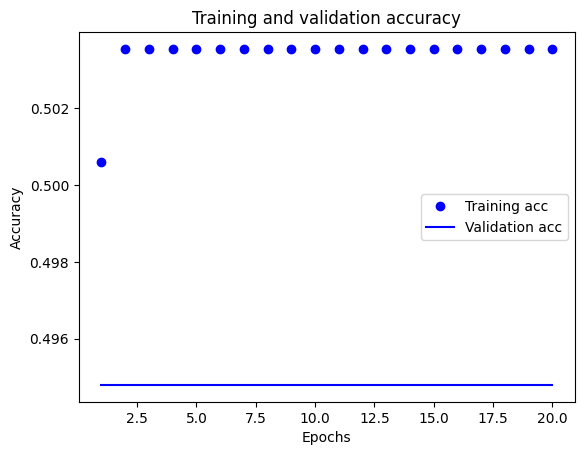

In [69]:
plt.clf() # Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
# Retrain a model from scratch for four epochs
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(1, activation="sigmoid"),
])


In [71]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4948 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5013 - loss: 0.6933
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4985 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4923 - loss: 0.6932
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4927 - loss: 0.6932


[0.6931480765342712, 0.5]

In [72]:
# Using a trained model to generate predictions on new data


# After having trained a model, you’ll want to use it in a practical setting. You can gener-
# ate the likelihood of reviews being positive by using the predict method

In [73]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.51685053],
       [0.5002316 ],
       [0.5002316 ],
       ...,
       [0.5002316 ],
       [0.5002316 ],
       [0.5002316 ]], dtype=float32)